In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

### The only thing thar changes here from svar_bitcoin is that here is used the volume of bitfinex without dividing by the bitcoin market cap

In [91]:
start_date = '2013-01-01'
end_date = '2023-07-15'

In [110]:
# read and load the csv files
df_bitfinex_volume = pd.read_csv("light_data/df_bitfinex_volume.csv")
total_out_BTC_USD = pd.read_csv("light_data/total_out_BTC_USD.csv")
df_fed_ffill = pd.read_csv("light_data/fed_ffill.csv")

total_out_BTC_USD.rename(columns={"Unnamed: 0": "Date"}, inplace=True)
df_bitfinex_volume.rename(columns={"Unnamed: 0": "Date"}, inplace=True)
df_bitfinex_volume.rename(columns={"Daily Volume": "Bitfinex_Daily_Volume"}, inplace=True)
df_fed_ffill.rename(columns={"date": "Date"}, inplace=True)

total_out_BTC_USD = total_out_BTC_USD[total_out_BTC_USD["Date"] >= start_date]
df_bitfinex_volume = df_bitfinex_volume[df_bitfinex_volume["Date"] >= start_date]

#df_fed_ffill = df_fed_ffill[df_fed_ffill["Date"] >= start_date]
#df_fed_ffill = df_fed_ffill[df_fed_ffill["Date"] <= end_date]

df_fred_with_nas = pd.read_csv("light_data/fred_data_nas.csv")
df_fred_with_nas.rename(columns={"date": "Date"}, inplace=True)



In [111]:
df_fred_with_nas

,Date,2yr_yield,10yr_3mo_spread,10yr_inflation,usd_index,sp500,btc_price
0,2013-11-14,0.29,2.61,2.18,93.4328,1790.62,NaN
1,2013-11-15,0.31,2.63,2.18,93.2854,1798.18,NaN
2,2013-11-16,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-11-17,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-11-18,0.31,2.58,2.19,92.9824,1791.53,NaN
...,...,...,...,...,...,...,...
3647,2023-11-09,5.03,-0.92,2.33,122.5677,4347.35,36669.30
3648,2023-11-10,5.04,-0.92,2.32,NaN,4415.24,37305.81
3649,2023-11-11,NaN,NaN,NaN,NaN,NaN,37156.47
3650,2023-11-12,NaN,NaN,NaN,NaN,NaN,37093.34


In [112]:
total_out_BTC_USD

,Date,total_out_BTC_usd
0,2013-03-31,8.506092e+05
1,2013-04-01,7.348477e+05
2,2013-04-02,1.545441e+06
3,2013-04-03,1.737993e+06
4,2013-04-04,1.967458e+06
...,...,...
3754,2023-07-11,1.835730e+08
3755,2023-07-12,1.975522e+08
3756,2023-07-13,2.349778e+08
3757,2023-07-14,2.077230e+08


In [113]:
df_agregated = df_fred_with_nas.copy()
df_agregated = df_agregated.merge(total_out_BTC_USD, on="Date", how="left")
df_agregated = df_agregated.merge(df_bitfinex_volume, on="Date", how="left")

In [114]:
df_agregated = df_agregated.dropna()
df_agregated

,Date,2yr_yield,10yr_3mo_spread,10yr_inflation,usd_index,sp500,btc_price,total_out_BTC_usd,Bitfinex_Daily_Volume
382,2014-12-01,0.49,2.19,1.79,99.8964,2053.44,370.00,3.856184e+06,11192.789028
383,2014-12-02,0.55,2.25,1.77,100.4478,2066.55,378.00,3.430502e+06,14324.210721
384,2014-12-03,0.57,2.28,1.79,100.5696,2074.33,378.00,3.897620e+06,13242.281198
385,2014-12-04,0.55,2.23,1.77,100.3931,2071.92,377.10,2.759969e+06,17780.492882
389,2014-12-08,0.64,2.23,1.71,101.3100,2060.31,375.00,3.572602e+06,35819.342129
...,...,...,...,...,...,...,...,...,...
3525,2023-07-10,4.85,-1.47,2.25,119.4908,4409.53,30427.52,1.816298e+08,1366.003787
3526,2023-07-11,4.88,-1.50,2.24,119.2556,4439.26,30636.22,1.835730e+08,1636.401373
3527,2023-07-12,4.72,-1.61,2.26,118.1838,4472.16,30379.01,1.975522e+08,3763.115501
3528,2023-07-13,4.59,-1.71,2.24,117.7307,4510.04,31471.53,2.349778e+08,2982.608992


<Axes: xlabel='Date'>

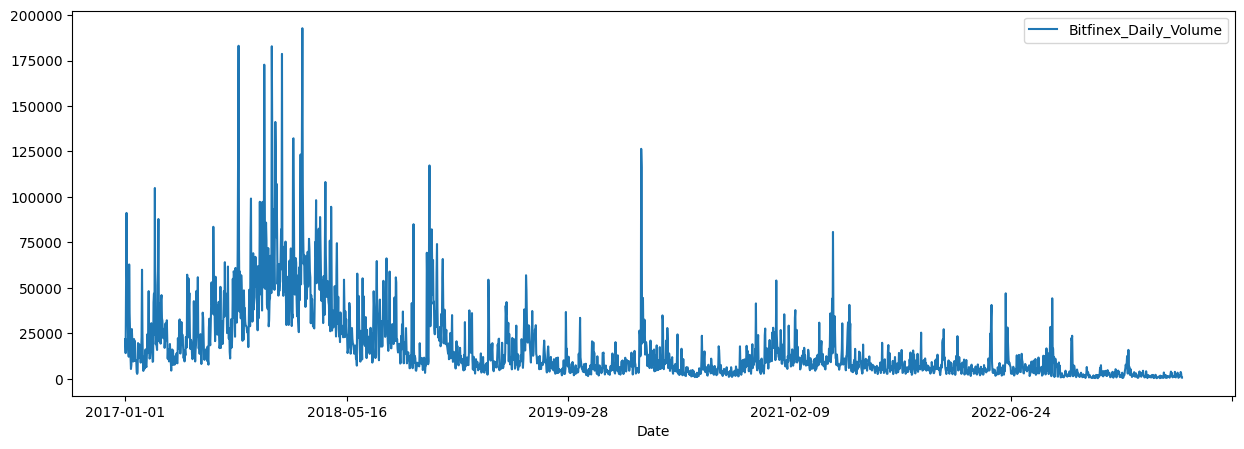

In [27]:
df_bitfinex_volume.plot(x="Date", y="Bitfinex_Daily_Volume", figsize=(15, 5))


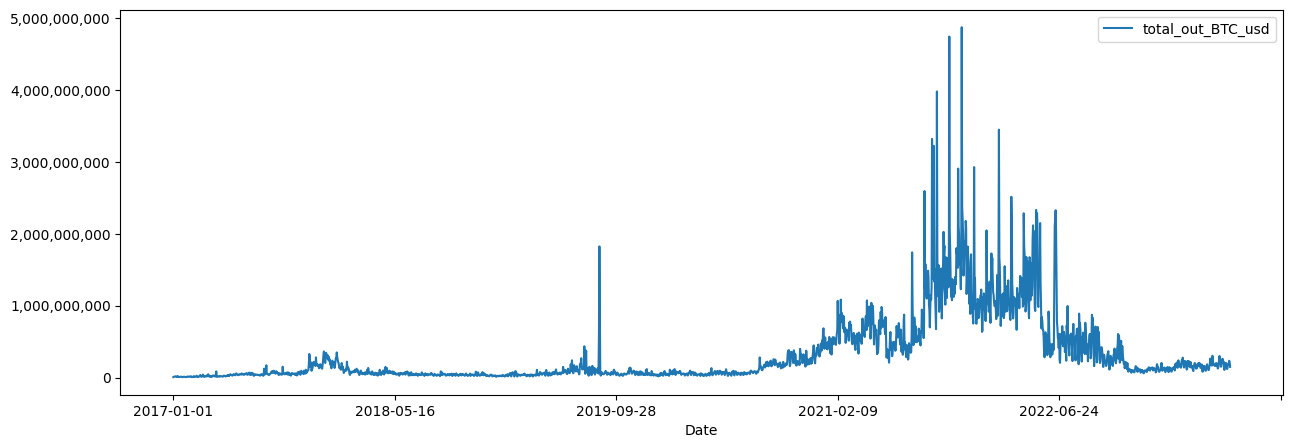

In [28]:
total_out_BTC_USD.plot(x="Date", y="total_out_BTC_usd", figsize=(15, 5))
ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.show()


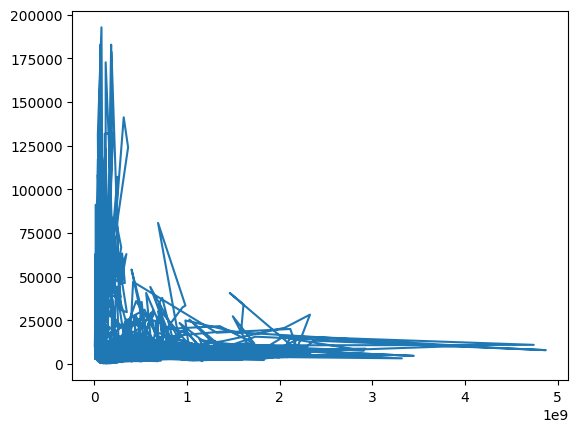

In [29]:
plt.plot(total_out_BTC_USD["total_out_BTC_usd"], df_bitfinex_volume["Bitfinex_Daily_Volume"])


# Verify stationarity

In [60]:
def test_stationarity(series):
    result = adfuller(series)
    p_value = result[1]
    
    if p_value <= 0.05:
        print("A série é estacionária.")
        return True
    else:
        print("A série não é estacionária.")
        return False

test_stationarity(total_out_BTC_USD["total_out_BTC_usd"])
test_stationarity(df_bitfinex_volume["Bitfinex_Daily_Volume"])

A série não é estacionária.
A série não é estacionária.


False

In [117]:
df_fed_stationary = pd.DataFrame()
df_fed_stationary["Date"] = df_agregated["Date"]
for col in df_agregated.columns:
    if col != "Date":
        print(col)
        result = test_stationarity(df_agregated[col])
        if result:
            df_fed_stationary[col] = df_agregated[col]
        else:
            df_fed_stationary[f"{col}_diff"] = df_agregated[col].diff()

df_fed_stationary = df_fed_stationary.dropna()


2yr_yield
A série não é estacionária.
10yr_3mo_spread
A série não é estacionária.
10yr_inflation
A série não é estacionária.
usd_index
A série não é estacionária.
sp500
A série não é estacionária.
btc_price
A série não é estacionária.
total_out_BTC_usd
A série não é estacionária.
Bitfinex_Daily_Volume
A série é estacionária.


In [118]:
df_fed_stationary

,Date,2yr_yield_diff,10yr_3mo_spread_diff,10yr_inflation_diff,usd_index_diff,sp500_diff,btc_price_diff,total_out_BTC_usd_diff,Bitfinex_Daily_Volume
383,2014-12-02,0.06,0.06,-0.02,0.5514,13.11,8.00,-4.256824e+05,14324.210721
384,2014-12-03,0.02,0.03,0.02,0.1218,7.78,0.00,4.671185e+05,13242.281198
385,2014-12-04,-0.02,-0.05,-0.02,-0.1765,-2.41,-0.90,-1.137651e+06,17780.492882
389,2014-12-08,0.09,0.00,-0.06,0.9169,-11.61,-2.10,8.126334e+05,35819.342129
391,2014-12-10,-0.05,-0.08,0.00,-0.2888,-34.17,-14.50,-3.423947e+05,34756.887395
...,...,...,...,...,...,...,...,...,...
3525,2023-07-10,-0.09,-0.07,-0.02,-0.1111,10.58,90.19,2.175391e+07,1366.003787
3526,2023-07-11,0.03,-0.03,-0.01,-0.2352,29.73,208.70,1.943238e+06,1636.401373
3527,2023-07-12,-0.16,-0.11,0.02,-1.0718,32.90,-257.21,1.397913e+07,3763.115501
3528,2023-07-13,-0.13,-0.10,-0.02,-0.4531,37.88,1092.52,3.742569e+07,2982.608992


In [119]:
df_fed_stationary.dropna(inplace=True)
df_fed_stationary

,Date,2yr_yield_diff,10yr_3mo_spread_diff,10yr_inflation_diff,usd_index_diff,sp500_diff,btc_price_diff,total_out_BTC_usd_diff,Bitfinex_Daily_Volume
383,2014-12-02,0.06,0.06,-0.02,0.5514,13.11,8.00,-4.256824e+05,14324.210721
384,2014-12-03,0.02,0.03,0.02,0.1218,7.78,0.00,4.671185e+05,13242.281198
385,2014-12-04,-0.02,-0.05,-0.02,-0.1765,-2.41,-0.90,-1.137651e+06,17780.492882
389,2014-12-08,0.09,0.00,-0.06,0.9169,-11.61,-2.10,8.126334e+05,35819.342129
391,2014-12-10,-0.05,-0.08,0.00,-0.2888,-34.17,-14.50,-3.423947e+05,34756.887395
...,...,...,...,...,...,...,...,...,...
3525,2023-07-10,-0.09,-0.07,-0.02,-0.1111,10.58,90.19,2.175391e+07,1366.003787
3526,2023-07-11,0.03,-0.03,-0.01,-0.2352,29.73,208.70,1.943238e+06,1636.401373
3527,2023-07-12,-0.16,-0.11,0.02,-1.0718,32.90,-257.21,1.397913e+07,3763.115501
3528,2023-07-13,-0.13,-0.10,-0.02,-0.4531,37.88,1092.52,3.742569e+07,2982.608992


# Diff for non stationary series

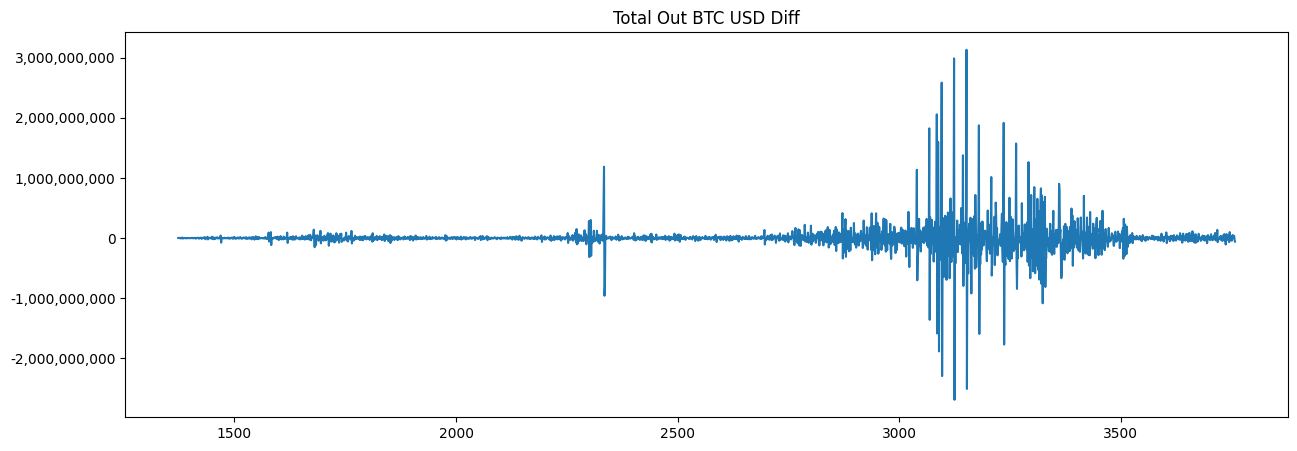

In [35]:
total_out_BTC_USD["total_out_BTC_usd_diff"].plot(figsize=(15, 5), title="Total Out BTC USD Diff")
ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.show()


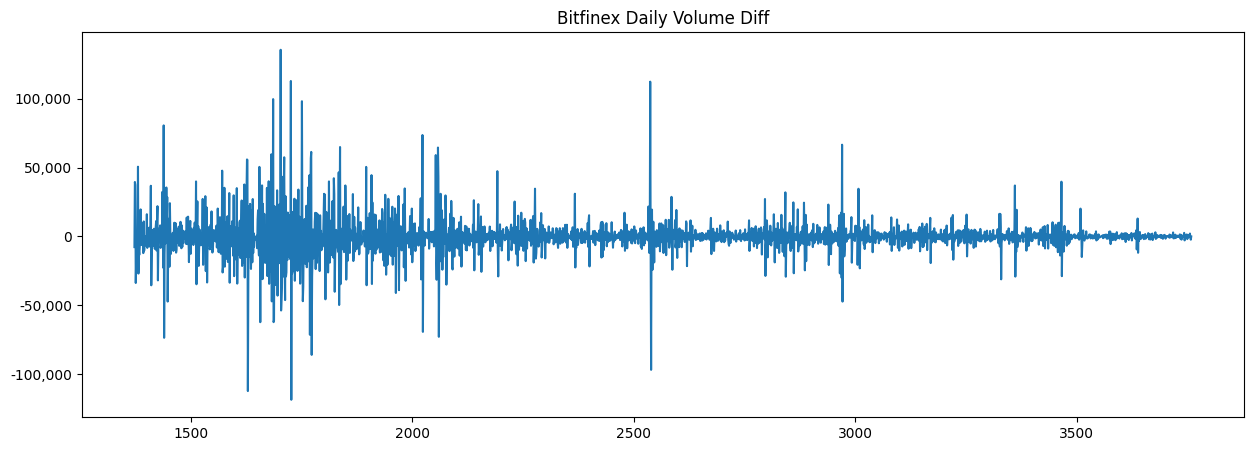

In [36]:
df_bitfinex_volume["Bitfinex_Daily_Volume_diff"].plot(figsize=(15, 5), title="Bitfinex Daily Volume Diff")
ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.show()


In [26]:
df_var = pd.concat([total_out_BTC_USD["total_out_BTC_usd_diff"], df_bitfinex_volume["Bitfinex_Daily_Volume_diff"]],axis=1)
df_var = df_var.set_index(df_bitfinex_volume["Date"]) 
df_var

,total_out_BTC_usd_diff,Bitfinex_Daily_Volume_diff
Date,,
2017-01-02,3.154958e+06,-7700.678791
2017-01-03,3.245569e+06,39620.883054
2017-01-04,2.824595e+06,37475.986099
2017-01-05,2.916766e+06,-33799.679819
2017-01-06,-1.726412e+06,-16802.146790
...,...,...
2023-07-11,1.943238e+06,270.397586
2023-07-12,1.397913e+07,2126.714128
2023-07-13,3.742569e+07,-780.506509


# Adjust VAR Model

In [120]:
df_fed_stationary.set_index(df_fed_stationary["Date"], inplace=True)
df_fed_stationary.drop(columns=["Date"], inplace=True)
df_fed_stationary

,2yr_yield_diff,10yr_3mo_spread_diff,10yr_inflation_diff,usd_index_diff,sp500_diff,btc_price_diff,total_out_BTC_usd_diff,Bitfinex_Daily_Volume
Date,,,,,,,,
2014-12-02,0.06,0.06,-0.02,0.5514,13.11,8.00,-4.256824e+05,14324.210721
2014-12-03,0.02,0.03,0.02,0.1218,7.78,0.00,4.671185e+05,13242.281198
2014-12-04,-0.02,-0.05,-0.02,-0.1765,-2.41,-0.90,-1.137651e+06,17780.492882
2014-12-08,0.09,0.00,-0.06,0.9169,-11.61,-2.10,8.126334e+05,35819.342129
2014-12-10,-0.05,-0.08,0.00,-0.2888,-34.17,-14.50,-3.423947e+05,34756.887395
...,...,...,...,...,...,...,...,...
2023-07-10,-0.09,-0.07,-0.02,-0.1111,10.58,90.19,2.175391e+07,1366.003787
2023-07-11,0.03,-0.03,-0.01,-0.2352,29.73,208.70,1.943238e+06,1636.401373
2023-07-12,-0.16,-0.11,0.02,-1.0718,32.90,-257.21,1.397913e+07,3763.115501


In [121]:
model = VAR(df_fed_stationary)
result = model.fit(2)  # 2 é o atraso (número de lags)

print(result.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 14, Nov, 2023
Time:                     10:33:31
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                    57.6551
Nobs:                     2114.00    HQIC:                   57.4244
Log likelihood:          -84417.9    FPE:                7.60744e+24
AIC:                      57.2912    Det(Omega_mle):     7.13528e+24
--------------------------------------------------------------------
Results for equation 2yr_yield_diff
                               coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------------
const                             0.001931         0.001440            1.341           0.180
L1.2yr_yield_diff                 0.008039         0.025985            0.309           0.757
L1.

/home/moises/.pyenv/versions/3.11.3/envs/research_btc/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [28]:
# Fazendo previsões para 2 períodos à frente
forecast = result.forecast(df_var.values, steps=2)

# Exibindo as previsões
print("Previsões:")
print(forecast)

Previsões:
[[ 2.43293837e+07  6.33262214e+02]
 [ 9.01357462e+06 -2.13976416e+02]]


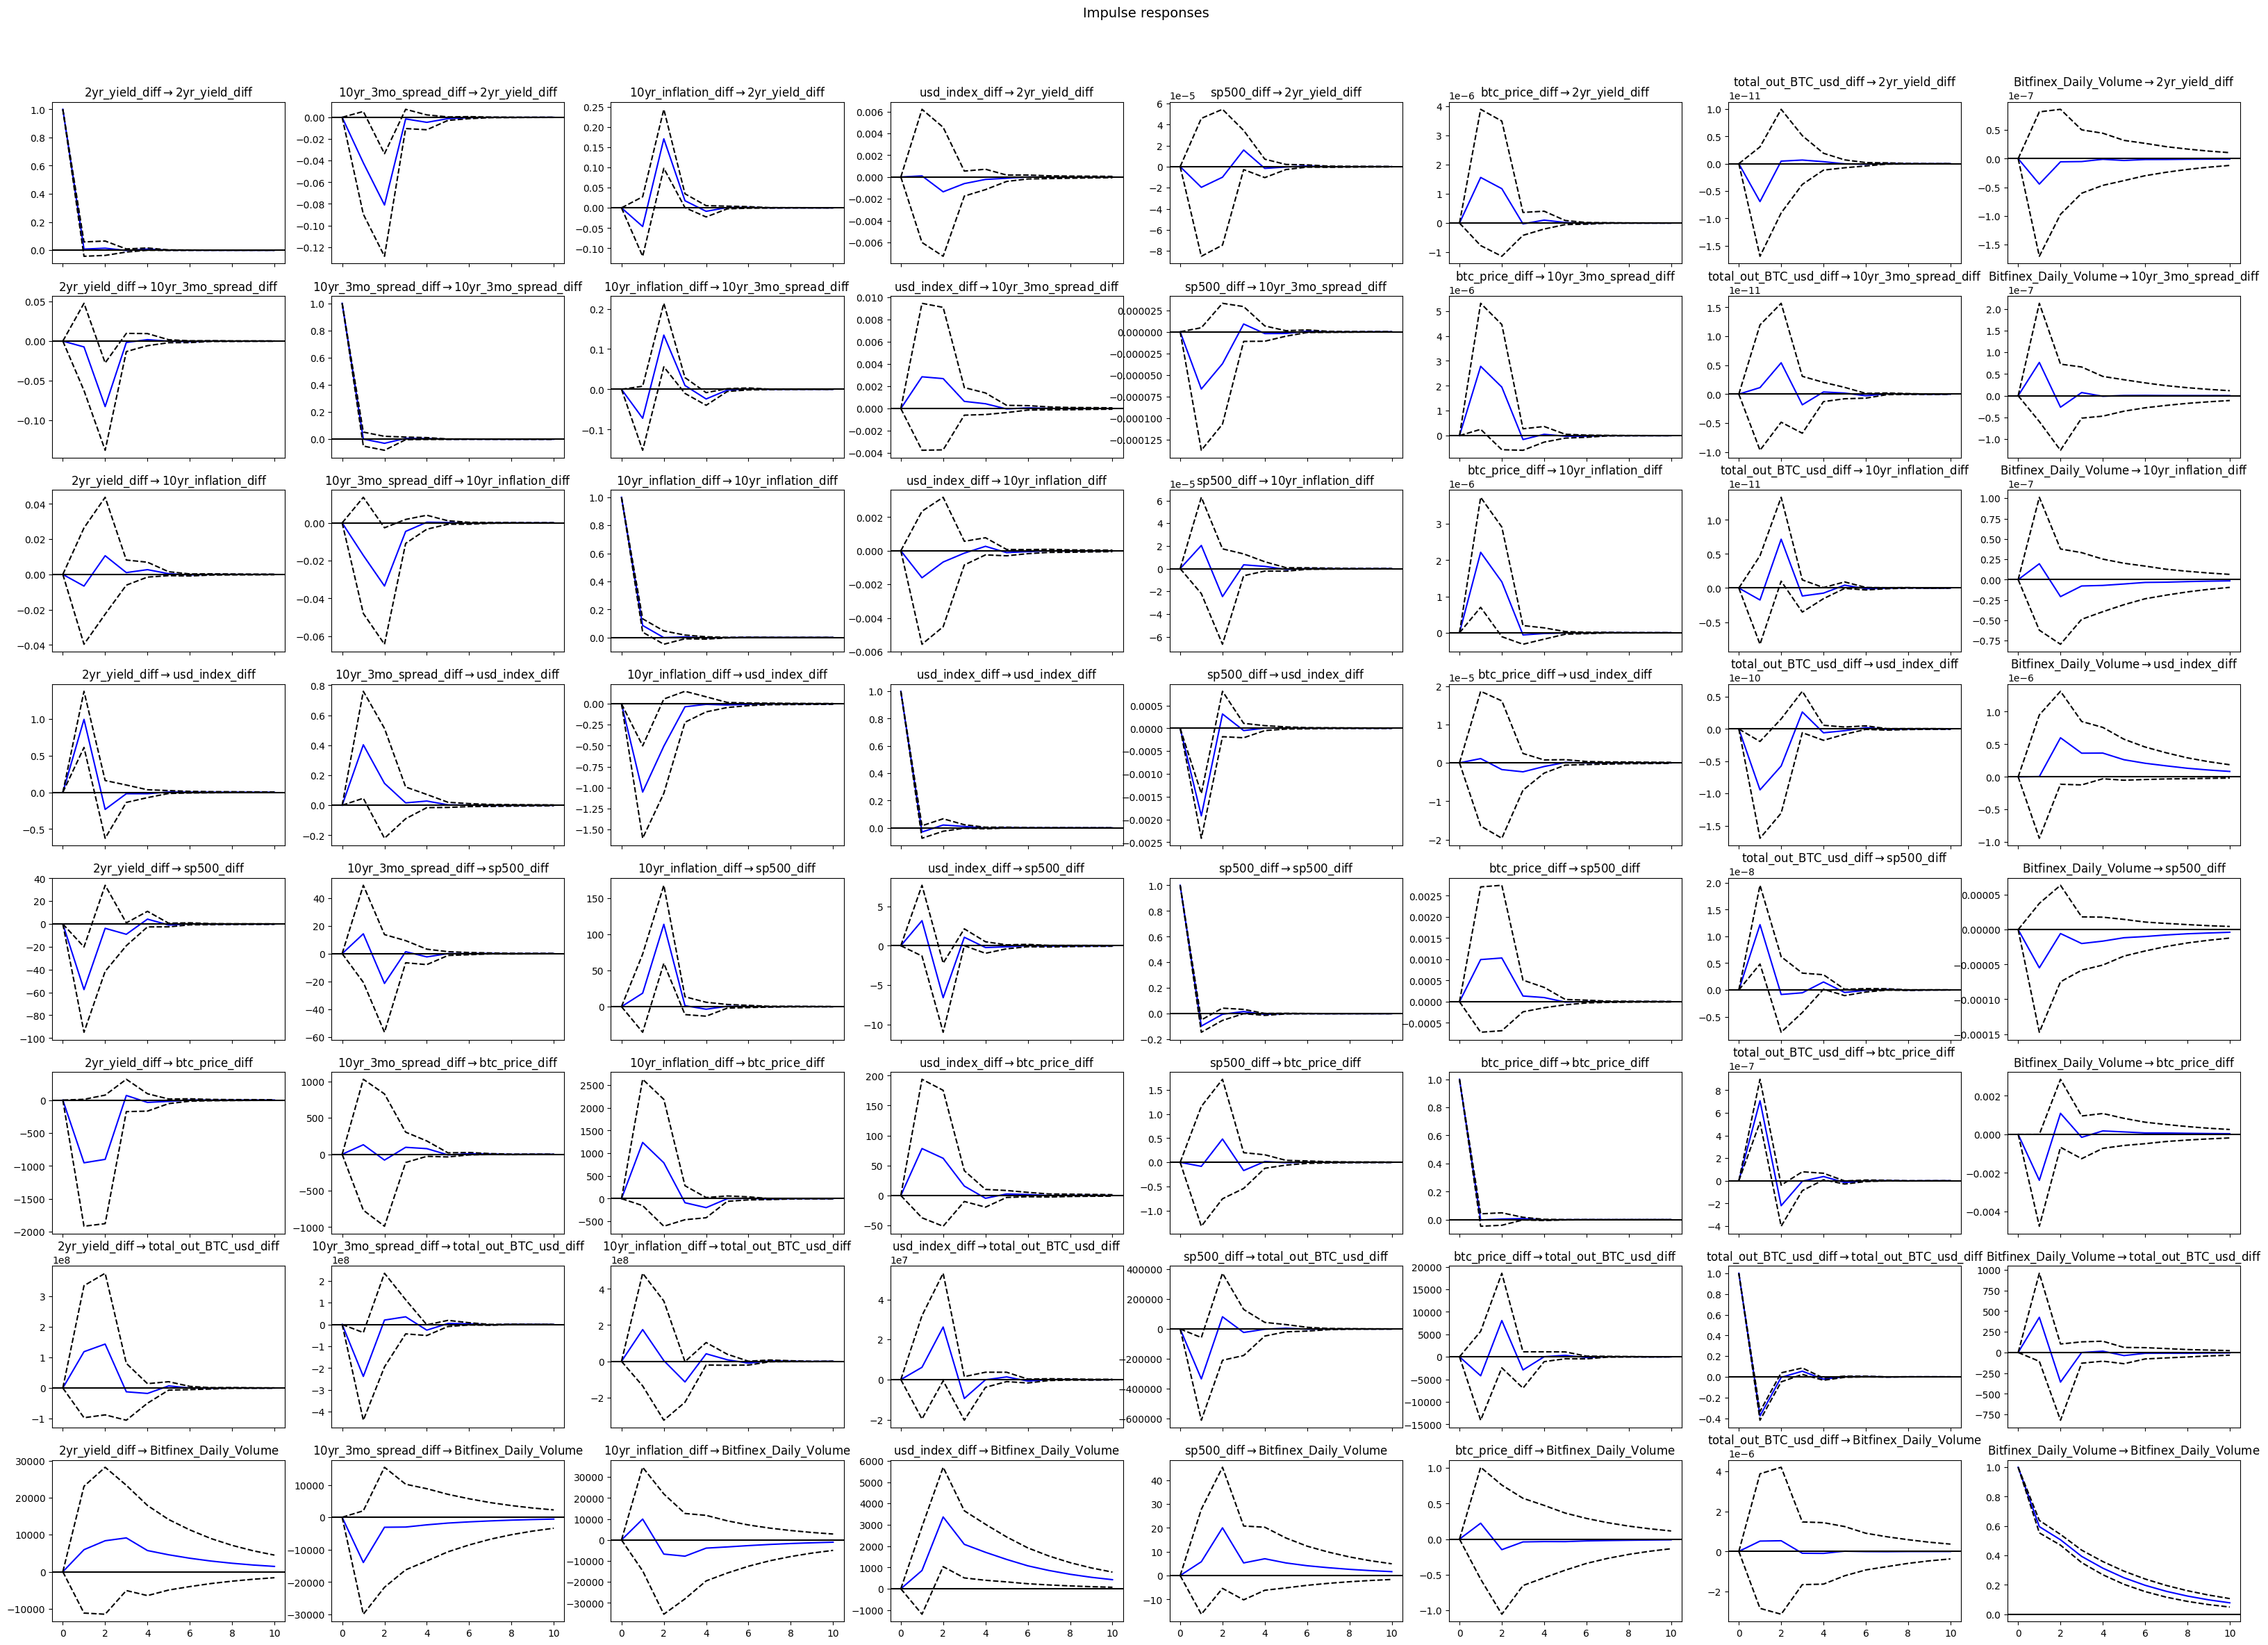

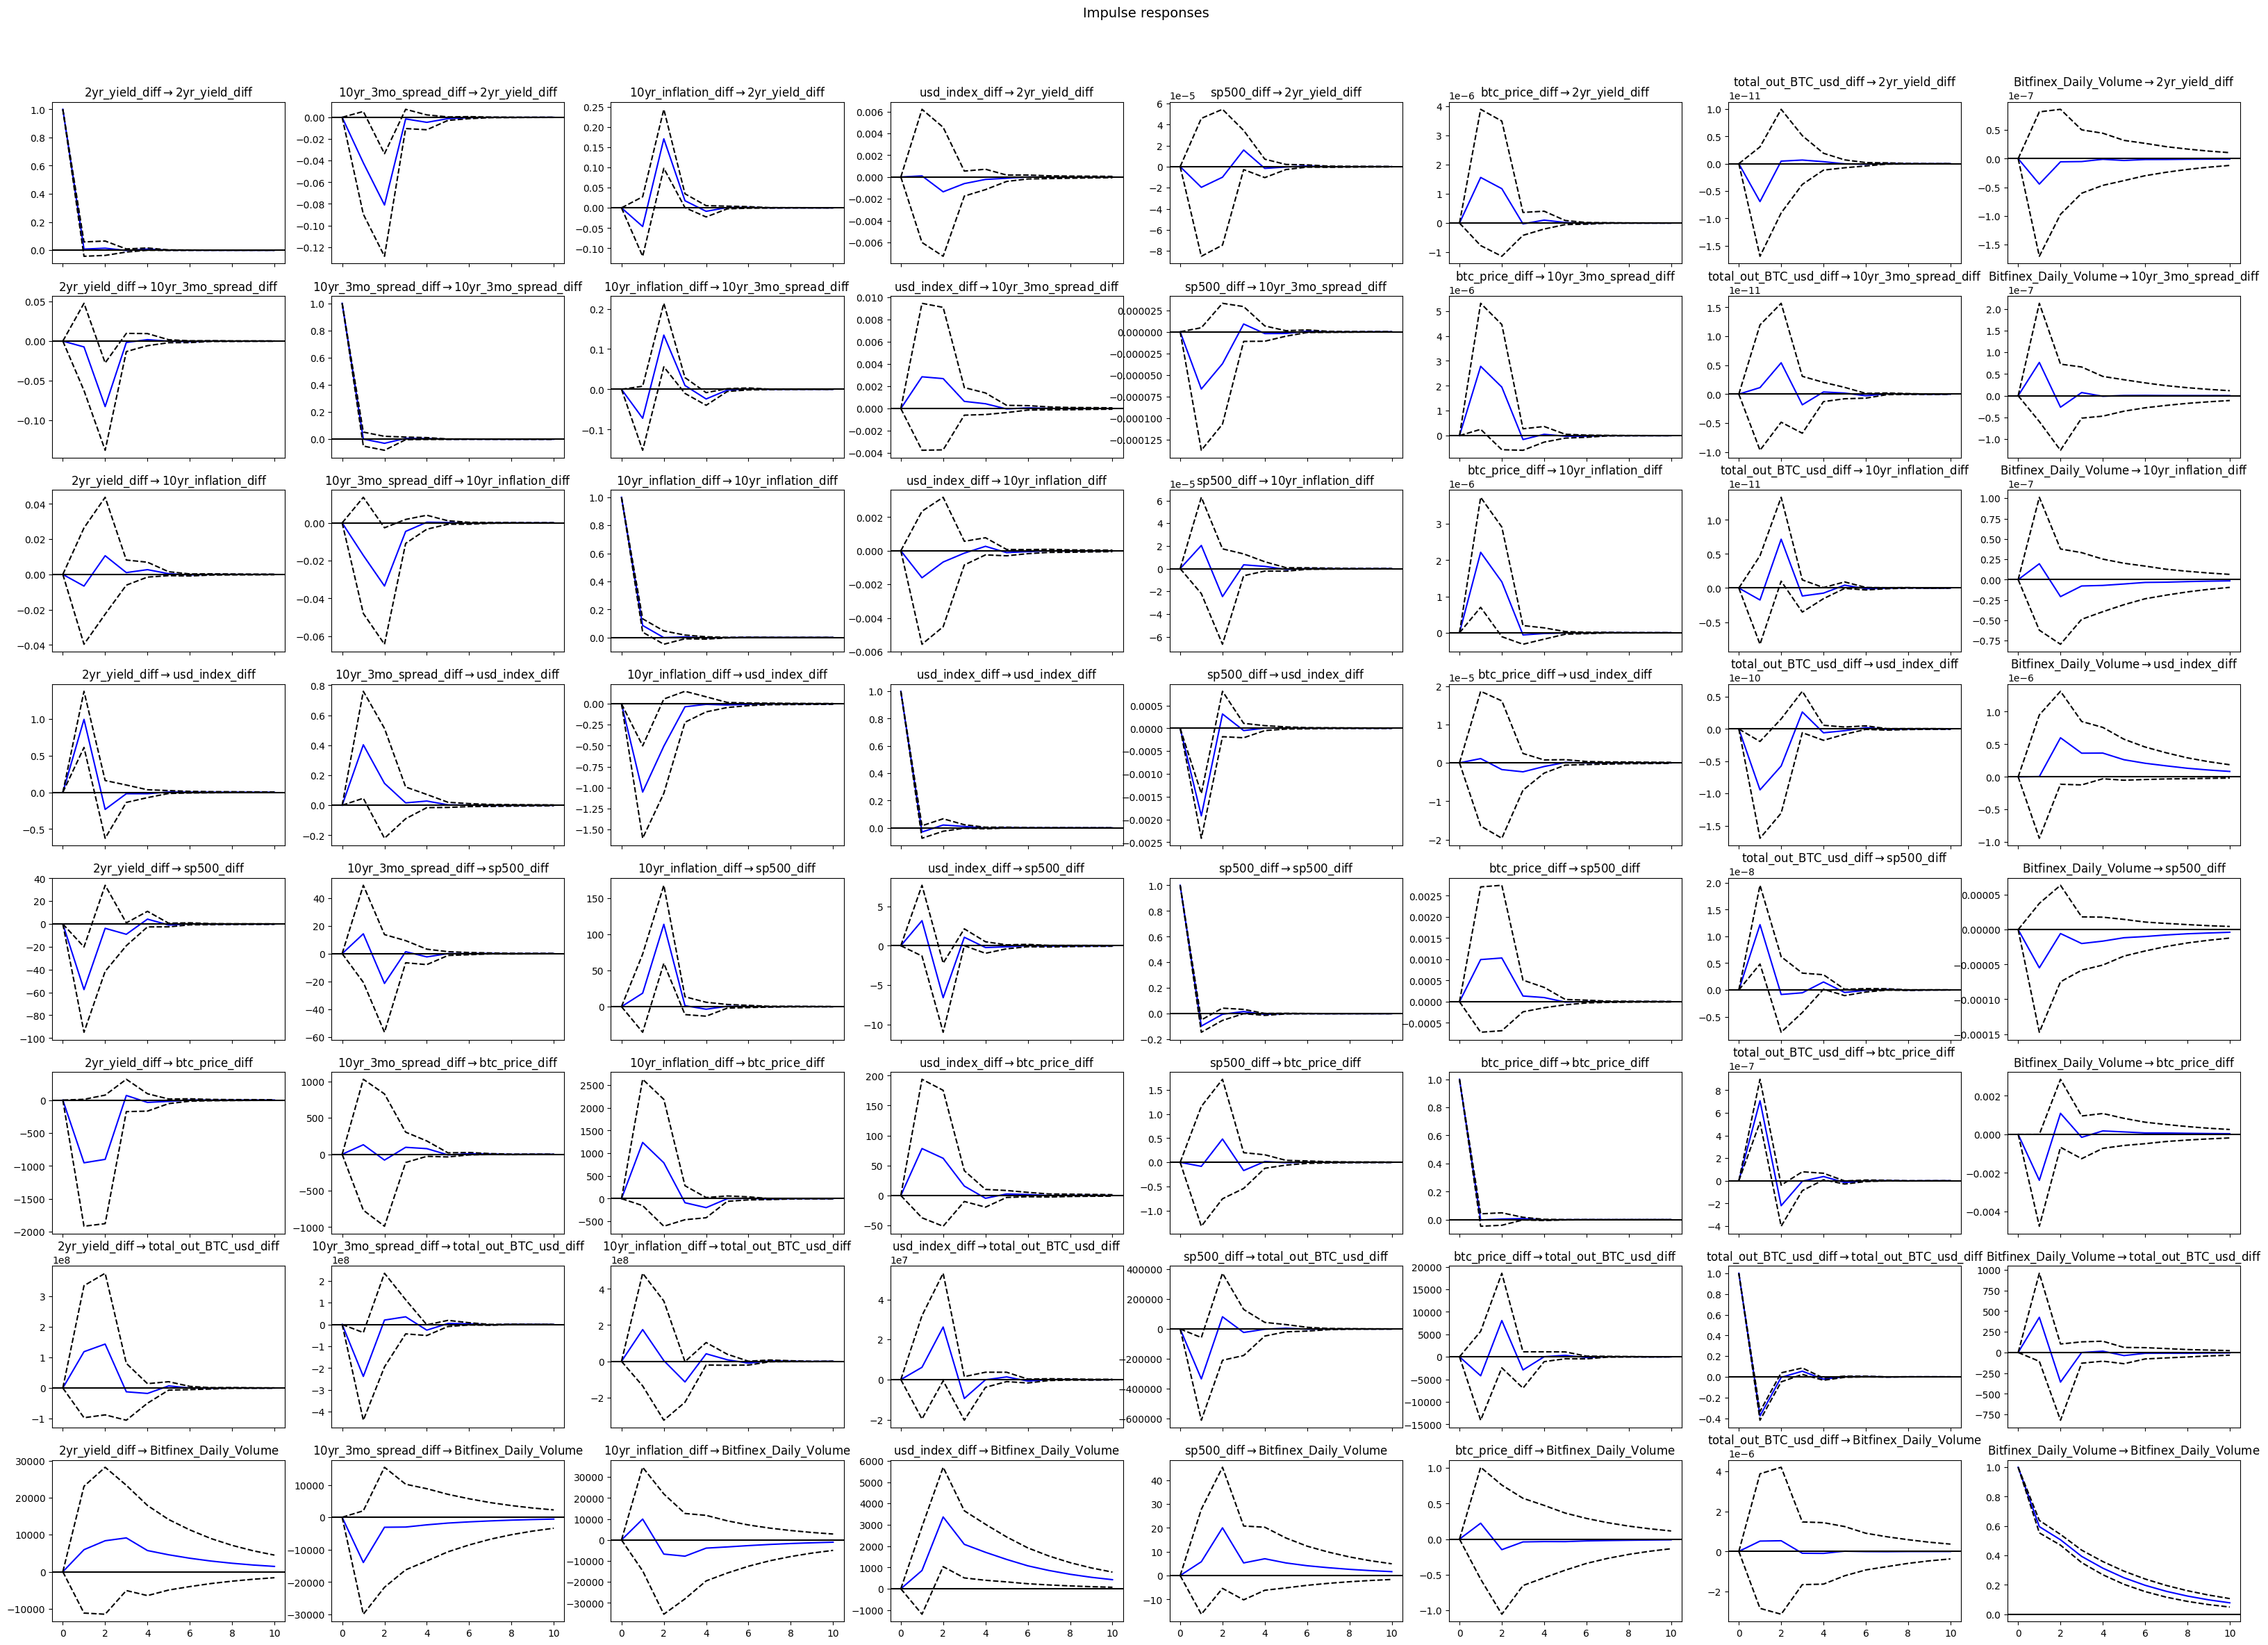

In [124]:
irf = result.irf(10)
irf.plot(figsize=(35,25))

Causalidade de granger 

In [42]:
from statsmodels.tsa.stattools import grangercausalitytests

# Teste de causalidade de Granger para a relação entre as variáveis 1 e 2, com atrasos até 2 períodos
max_lag = 60
test_result = grangercausalitytests(df_var[['total_out_BTC_usd_diff','Bitfinex_Daily_Volume_diff']], max_lag, verbose=True)

# O teste_result conterá estatísticas e valores p para cada atraso testado
# Verifique os resultados para cada atraso e interprete os valores p para determinar a causalidade de Granger


/home/moises/.pyenv/versions/3.11.3/envs/research_btc/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/moises/.pyenv/versions/3.11.3/envs/research_btc/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=10.5186 , p=0.0012  , df_denom=2382, df_num=1
ssr based chi2 test:   chi2=10.5319 , p=0.0012  , df=1
likelihood ratio test: chi2=10.5087 , p=0.0012  , df=1
parameter F test:         F=10.5186 , p=0.0012  , df_denom=2382, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=8.9332  , p=0.0001  , df_denom=2379, df_num=2
ssr based chi2 test:   chi2=17.9039 , p=0.0001  , df=2
likelihood ratio test: chi2=17.8370 , p=0.0001  , df=2
parameter F test:         F=8.9332  , p=0.0001  , df_denom=2379, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=6.1861  , p=0.0003  , df_denom=2376, df_num=3
ssr based chi2 test:   chi2=18.6130 , p=0.0003  , df=3
likelihood ratio test: chi2=18.5407 , p=0.0003  , df=3
parameter F test:         F=6.1861  , p=0.0003  , df_denom=2376, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=5.1499  , p=0.

In [43]:
max_lag = 60
test_result = grangercausalitytests(df_var[['Bitfinex_Daily_Volume_diff','total_out_BTC_usd_diff']], max_lag, verbose=True)

/home/moises/.pyenv/versions/3.11.3/envs/research_btc/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3341  , p=0.5633  , df_denom=2382, df_num=1
ssr based chi2 test:   chi2=0.3346  , p=0.5630  , df=1
likelihood ratio test: chi2=0.3345  , p=0.5630  , df=1
parameter F test:         F=0.3341  , p=0.5633  , df_denom=2382, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1235  , p=0.8838  , df_denom=2379, df_num=2
ssr based chi2 test:   chi2=0.2475  , p=0.8836  , df=2
likelihood ratio test: chi2=0.2475  , p=0.8836  , df=2
parameter F test:         F=0.1235  , p=0.8838  , df_denom=2379, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4024  , p=0.7513  , df_denom=2376, df_num=3
ssr based chi2 test:   chi2=1.2108  , p=0.7504  , df=3
likelihood ratio test: chi2=1.2105  , p=0.7505  , df=3
parameter F test:         F=0.4024  , p=0.7513  , df_denom=2376, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.3180  , p=0.